<a href="https://colab.research.google.com/github/Buuuuli/AIPI540_individual/blob/main/try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT, force_remount=False)

Mounted at /content/drive


In [ ]:
#PROJ ="MyDrive/repos"
#PROJECT_PATH = join(ROOT, PROJ)
#!mkdir "PROJECT_PATH"

In [ ]:
!ls

drive  sample_data


In [ ]:
%cd /content/drive/"My Drive"/AIPI540

/content/drive/My Drive/AIPI540


In [55]:
import os
import urllib.request
import zipfile
import copy
import time
import numpy as np
import pandas as pd
import torch
from torchvision import datasets, transforms
import torchvision
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import FashionMNIST
from torchsummary import summary
import cv2 as cv
import glob
from PIL import Image
import pickle as pkl
from tqdm import tqdm



from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# check what types of image we get
#set the image directory
files = os.listdir("./image/")
# print the types of image
print(set([x.split(".")[1] for x in files]))


{'jpg'}


In [ ]:
# prepare the directory for each image type
extensions = ("*.jpg")
path = []
for extension in extensions:
    path.extend(glob.glob("./image/"+extension))

In [ ]:
# set the transforms
trans = transforms.Compose([transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [ ]:
# read data
cv_img = []
for img in tqdm(path):
    # read image > to Tensor > permute the data > resize > flatten
    try:
      n = trans(cv.imread(img))
    except:
      print(img)
      pass
    cv_img.append(n)

  0%|          | 27/10016 [00:21<2:38:52,  1.05it/s]

./image/ISIC_0033327.jpg


  0%|          | 28/10016 [00:22<2:26:22,  1.14it/s]

./image/ISIC_0033335.jpg


  0%|          | 30/10016 [00:24<2:57:17,  1.07s/it]

./image/ISIC_0033358.jpg


  0%|          | 39/10016 [00:30<1:32:13,  1.80it/s]

In [ ]:
cv_img[2]

tensor([[[205, 169, 185],
         [207, 172, 186],
         [210, 176, 187],
         ...,
         [187, 150, 176],
         [183, 148, 174],
         [176, 145, 174]],

        [[202, 171, 186],
         [206, 175, 184],
         [208, 172, 186],
         ...,
         [182, 147, 174],
         [181, 147, 171],
         [176, 144, 175]],

        [[204, 171, 185],
         [204, 171, 185],
         [207, 171, 185],
         ...,
         [178, 147, 174],
         [179, 142, 174],
         [177, 142, 176]],

        ...,

        [[201, 171, 190],
         [199, 171, 190],
         [197, 170, 186],
         ...,
         [171, 132, 178],
         [169, 131, 179],
         [168, 132, 176]],

        [[204, 173, 188],
         [201, 174, 190],
         [205, 170, 190],
         ...,
         [178, 139, 184],
         [175, 139, 183],
         [172, 138, 178]],

        [[205, 171, 188],
         [204, 172, 191],
         [206, 170, 192],
         ...,
         [180, 145, 185],
        

In [ ]:
# Split training data to get a validation set
num_train = int(len(train_dataset) * 0.95)
split_train_dataset, split_valid_dataset = random_split(train_dataset, [num_train, len(train_dataset) - num_train])

In [ ]:
batch_size = 16

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
#with open('./read_imgs.pkl','wb') as fp:
  #pkl.dump(cv_img,fp)

In [ ]:
with open('./read_imgs.pkl', 'rb') as fp:
  imgs = pkl.load(fp)

In [ ]:
# Instantiate pre-trained resnet
net = torchvision.models.resnet18(pretrained=True)
# Shut off autograd for all layers to freeze model so the layer weights are not trained
for param in net.parameters():
    param.requires_grad = False

# Display a summary of the layers of the model and output shape after each layer
summary(net,(images.shape[1:]),batch_size=batch_size,device="cpu")

In [ ]:
# Get the number of inputs to final Linear layer
num_ftrs = net.fc.in_features
# Replace final Linear layer with a new Linear with the same number of inputs but just 2 outputs,
# since we have 2 classes - bees and ants
net.fc = nn.Linear(num_ftrs, 2)

In [ ]:
# Cross entropy loss combines softmax and nn.NLLLoss() in one single class.
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [56]:
url1 = 'https://github.com/Buuuuli/AIPI540_individual/blob/main/metadata/raw_metadata.csv?raw=true'

In [57]:
url = 'https://github.com/Buuuuli/AIPI540_individual/blob/main/metadata/tidy_data.csv?raw=true'
df = pd.read_csv(url1,index_col=0)
print(df.head(5))

                 image_id   dx    dx_type   age     sex     localization
lesion_id                                                               
HAM_0000550  ISIC_0024306   nv  follow_up  45.0    male            trunk
HAM_0003577  ISIC_0024307   nv  follow_up  50.0    male  lower extremity
HAM_0001477  ISIC_0024308   nv  follow_up  55.0  female            trunk
HAM_0000484  ISIC_0024309   nv  follow_up  40.0    male            trunk
HAM_0003350  ISIC_0024310  mel      histo  60.0    male            chest


In [58]:
df.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [ ]:
#df['dx'] = df['dx'].map({"nv":0,"mel":1,"bkl":2,"bcc":3,"akiec":4,"vasc":5,"df":6})

In [59]:
# group age
bins =[0,10,20,30,40,50,60,70,80,90]
labels = ['children','teenage','young','adult','midage','old1','old2','old3','older']

df['ageGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df = df.drop("age", axis=1)

In [60]:
# {0: 'akiec', 1: 'bcc', 2: 'bkl', 3: 'df', 4: 'mel', 5: 'nv', 6: 'vasc'}
dx_dict = dict(enumerate(df['dx'].astype('category').cat.categories))

# {0: 'confocal', 1: 'consensus', 2: 'follow_up', 3: 'histo'}
dx_type_dict = dict(enumerate(df['dx_type'].astype('category').cat.categories))

# {0: 'female', 1: 'male', 2: 'unknown'}
sex_dict = dict(enumerate(df['sex'].astype('category').cat.categories))

# {0: 'abdomen', 1: 'acral', 2: 'back', 3: 'chest', 4: 'ear',
# 5: 'face', 6: 'foot', 7: 'genital', 8: 'hand', 9: 'lower extremity',
# 10: 'neck', 11: 'scalp', 12: 'trunk', 13: 'unknown', 14: 'upper extremity'}
localization_dict = dict(enumerate(df['localization'].astype('category').cat.categories))

# {0: 'children', 1: 'teenage', 2: 'young', 3: 'adult', 4: 'midage',
# 5: 'old', 6: 'old2', 7: 'old3', 8: 'older'}
ageGroup_dict = dict(enumerate(df['ageGroup'].astype('category').cat.categories))

In [61]:
# encode 'dx','dx_type','sex', 'localization'
for col in ['dx','dx_type','sex','localization','ageGroup']:
    df[col] = df[col].astype('category') # Convert to category type
    df[col] = df[col].cat.codes # Convert to numerical code

In [65]:
df.dx.value_counts()

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: dx, dtype: int64

In [ ]:
#df['dx_type'] = df['dx_type'].map({"histo":0,"follow_up":1,"consensus":2,"confocal":3})

In [ ]:
#df.sex.value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [ ]:
#df['sex'] = df['sex'].map({"male":0,"female":1,"unknow":2})

In [ ]:
#df.localization.value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [ ]:
#df['localization'] = df['localization'].map({"back":0,"lower extremity":1,"trunk":2,"upper extremity":3,"abdomen":4,"face":5,"chest":6,
                                             "foot":7,"unkown":8,"neck":9,"scalp":10,"hand":11,"ear":12,"genital":13,"acral":14})

In [ ]:
#df.ageGroup.value_counts()

midage      2284
old1        2196
old2        1534
old3        1374
adult       1217
older        694
young        416
children     125
teenage      118
Name: ageGroup, dtype: int64

In [ ]:
#df['ageGroup'] = df['ageGroup'].map({"teenage":0,"children":1,"young":2,"older":3,"adult":4,"old3":5,"old2":6,
                                             "old1":7,"midage":8})

In [ ]:
#df.head()

,image_id,dx,dx_type,sex,localization,ageGroup
lesion_id,,,,,,
HAM_0000550,ISIC_0024306,0,1,0.0,2.0,8
HAM_0003577,ISIC_0024307,0,1,0.0,1.0,7
HAM_0001477,ISIC_0024308,0,1,1.0,2.0,7
HAM_0000484,ISIC_0024309,0,1,0.0,2.0,8
HAM_0003350,ISIC_0024310,1,0,0.0,6.0,6


In [66]:
X_meta = df[['dx_type','sex','localization','ageGroup']]

In [67]:
y_meta = df[['dx']]

In [68]:
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(X_meta, y_meta, test_size=0.2,shuffle=True ,random_state=45)

In [69]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf':[1,3,10],'n_estimators':[100,1000],
          'max_features':[0.1,0.5,1.],'max_samples':[0.5,None],'max_depth':[7]}

model = RandomForestClassifier()
grid_search = GridSearchCV(model,params,cv=3,verbose=10)
grid_search.fit(X_train_meta,y_train_meta)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 1/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=100;, score=0.721 total time=   0.3s
[CV 2/3; 1/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 1/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=100;, score=0.712 total time=   0.3s
[CV 3/3; 1/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 1/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=100;, score=0.714 total time=   0.3s
[CV 1/3; 2/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 2/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=1000;, score=0.719 total time=   2.7s
[CV 2/3; 2/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 2/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=1000;, score=0.714 total time=   2.7s
[CV 3/3; 2/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 2/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=1, n_estimators=1000;, score=0.716 total time=   2.7s
[CV 1/3; 3/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 3/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=3, n_estimators=100;, score=0.712 total time=   0.3s
[CV 2/3; 3/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 3/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=3, n_estimators=100;, score=0.708 total time=   0.3s
[CV 3/3; 3/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 3/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=3, n_estimators=100;, score=0.713 total time=   0.3s
[CV 1/3; 4/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 4/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=3, n_estimators=1000;, score=0.713 total time=   2.6s
[CV 2/3; 4/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 4/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=3, n_estimators=1000;, score=0.709 total time=   2.6s
[CV 3/3; 4/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 4/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=3, n_estimators=1000;, score=0.712 total time=   2.6s
[CV 1/3; 5/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 5/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=10, n_estimators=100;, score=0.710 total time=   0.3s
[CV 2/3; 5/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 5/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=10, n_estimators=100;, score=0.705 total time=   0.3s
[CV 3/3; 5/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 5/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=10, n_estimators=100;, score=0.708 total time=   0.3s
[CV 1/3; 6/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 6/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=10, n_estimators=1000;, score=0.707 total time=   2.6s
[CV 2/3; 6/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 6/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=10, n_estimators=1000;, score=0.703 total time=   2.6s
[CV 3/3; 6/36] START max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 6/36] END max_depth=7, max_features=0.1, max_samples=0.5, min_samples_leaf=10, n_estimators=1000;, score=0.709 total time=   2.7s
[CV 1/3; 7/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 7/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=1, n_estimators=100;, score=0.720 total time=   0.3s
[CV 2/3; 7/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 7/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=1, n_estimators=100;, score=0.713 total time=   0.3s
[CV 3/3; 7/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 7/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=1, n_estimators=100;, score=0.717 total time=   0.3s
[CV 1/3; 8/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 8/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=1, n_estimators=1000;, score=0.717 total time=   2.9s
[CV 2/3; 8/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 8/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=1, n_estimators=1000;, score=0.711 total time=   2.9s
[CV 3/3; 8/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 8/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=1, n_estimators=1000;, score=0.715 total time=   2.8s
[CV 1/3; 9/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 9/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=3, n_estimators=100;, score=0.716 total time=   0.3s
[CV 2/3; 9/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 9/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=3, n_estimators=100;, score=0.711 total time=   0.3s
[CV 3/3; 9/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 9/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=3, n_estimators=100;, score=0.711 total time=   0.3s
[CV 1/3; 10/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 10/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=3, n_estimators=1000;, score=0.711 total time=   2.9s
[CV 2/3; 10/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 10/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=3, n_estimators=1000;, score=0.708 total time=   2.8s
[CV 3/3; 10/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 10/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=3, n_estimators=1000;, score=0.714 total time=   2.8s
[CV 1/3; 11/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 11/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=10, n_estimators=100;, score=0.711 total time=   0.3s
[CV 2/3; 11/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 11/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=10, n_estimators=100;, score=0.704 total time=   0.3s
[CV 3/3; 11/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 11/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=10, n_estimators=100;, score=0.712 total time=   0.3s
[CV 1/3; 12/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 12/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=10, n_estimators=1000;, score=0.713 total time=   2.8s
[CV 2/3; 12/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 12/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=10, n_estimators=1000;, score=0.704 total time=   2.8s
[CV 3/3; 12/36] START max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 12/36] END max_depth=7, max_features=0.1, max_samples=None, min_samples_leaf=10, n_estimators=1000;, score=0.710 total time=   2.8s
[CV 1/3; 13/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 13/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=1, n_estimators=100;, score=0.712 total time=   0.3s
[CV 2/3; 13/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 13/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=1, n_estimators=100;, score=0.713 total time=   0.3s
[CV 3/3; 13/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 13/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=1, n_estimators=100;, score=0.716 total time=   0.3s
[CV 1/3; 14/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 14/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=1, n_estimators=1000;, score=0.721 total time=   2.8s
[CV 2/3; 14/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 14/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=1, n_estimators=1000;, score=0.709 total time=   2.8s
[CV 3/3; 14/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 14/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=1, n_estimators=1000;, score=0.716 total time=   2.7s
[CV 1/3; 15/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 15/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=3, n_estimators=100;, score=0.720 total time=   0.3s
[CV 2/3; 15/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 15/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=3, n_estimators=100;, score=0.714 total time=   0.3s
[CV 3/3; 15/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 15/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=3, n_estimators=100;, score=0.717 total time=   0.3s
[CV 1/3; 16/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 16/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=3, n_estimators=1000;, score=0.718 total time=   2.7s
[CV 2/3; 16/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 16/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=3, n_estimators=1000;, score=0.710 total time=   2.7s
[CV 3/3; 16/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 16/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=3, n_estimators=1000;, score=0.718 total time=   2.8s
[CV 1/3; 17/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 17/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=10, n_estimators=100;, score=0.713 total time=   0.3s
[CV 2/3; 17/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 17/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=10, n_estimators=100;, score=0.708 total time=   0.3s
[CV 3/3; 17/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 17/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=10, n_estimators=100;, score=0.714 total time=   0.3s
[CV 1/3; 18/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 18/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=10, n_estimators=1000;, score=0.719 total time=   2.7s
[CV 2/3; 18/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 18/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=10, n_estimators=1000;, score=0.708 total time=   2.7s
[CV 3/3; 18/36] START max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 18/36] END max_depth=7, max_features=0.5, max_samples=0.5, min_samples_leaf=10, n_estimators=1000;, score=0.713 total time=   2.7s
[CV 1/3; 19/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 19/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=1, n_estimators=100;, score=0.719 total time=   0.3s
[CV 2/3; 19/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 19/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=1, n_estimators=100;, score=0.708 total time=   0.3s
[CV 3/3; 19/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 19/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=1, n_estimators=100;, score=0.718 total time=   0.3s
[CV 1/3; 20/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 20/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=1, n_estimators=1000;, score=0.720 total time=   3.1s
[CV 2/3; 20/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 20/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=1, n_estimators=1000;, score=0.709 total time=   3.0s
[CV 3/3; 20/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 20/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=1, n_estimators=1000;, score=0.718 total time=   3.1s
[CV 1/3; 21/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 21/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=3, n_estimators=100;, score=0.715 total time=   0.3s
[CV 2/3; 21/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 21/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=3, n_estimators=100;, score=0.714 total time=   0.3s
[CV 3/3; 21/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 21/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=3, n_estimators=100;, score=0.715 total time=   0.3s
[CV 1/3; 22/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 22/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=3, n_estimators=1000;, score=0.719 total time=   3.0s
[CV 2/3; 22/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 22/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=3, n_estimators=1000;, score=0.709 total time=   3.0s
[CV 3/3; 22/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 22/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=3, n_estimators=1000;, score=0.718 total time=   3.0s
[CV 1/3; 23/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 23/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=10, n_estimators=100;, score=0.716 total time=   0.3s
[CV 2/3; 23/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 23/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=10, n_estimators=100;, score=0.709 total time=   0.3s
[CV 3/3; 23/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 23/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=10, n_estimators=100;, score=0.716 total time=   0.3s
[CV 1/3; 24/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 24/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=10, n_estimators=1000;, score=0.716 total time=   3.0s
[CV 2/3; 24/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 24/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=10, n_estimators=1000;, score=0.712 total time=   2.9s
[CV 3/3; 24/36] START max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 24/36] END max_depth=7, max_features=0.5, max_samples=None, min_samples_leaf=10, n_estimators=1000;, score=0.715 total time=   2.9s
[CV 1/3; 25/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 25/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=1, n_estimators=100;, score=0.723 total time=   0.3s
[CV 2/3; 25/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 25/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=1, n_estimators=100;, score=0.719 total time=   0.3s
[CV 3/3; 25/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 25/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=1, n_estimators=100;, score=0.716 total time=   0.3s
[CV 1/3; 26/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 26/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=1, n_estimators=1000;, score=0.725 total time=   2.9s
[CV 2/3; 26/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 26/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=1, n_estimators=1000;, score=0.717 total time=   3.0s
[CV 3/3; 26/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 26/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=1, n_estimators=1000;, score=0.716 total time=   3.0s
[CV 1/3; 27/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 27/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=3, n_estimators=100;, score=0.721 total time=   0.3s
[CV 2/3; 27/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 27/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=3, n_estimators=100;, score=0.716 total time=   0.3s
[CV 3/3; 27/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 27/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=3, n_estimators=100;, score=0.716 total time=   0.3s
[CV 1/3; 28/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 28/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=3, n_estimators=1000;, score=0.722 total time=   3.0s
[CV 2/3; 28/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 28/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=3, n_estimators=1000;, score=0.715 total time=   3.1s
[CV 3/3; 28/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 28/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=3, n_estimators=1000;, score=0.716 total time=   2.9s
[CV 1/3; 29/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 29/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=10, n_estimators=100;, score=0.721 total time=   0.3s
[CV 2/3; 29/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 29/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=10, n_estimators=100;, score=0.711 total time=   0.3s
[CV 3/3; 29/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 29/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=10, n_estimators=100;, score=0.715 total time=   0.3s
[CV 1/3; 30/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 30/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=10, n_estimators=1000;, score=0.720 total time=   3.0s
[CV 2/3; 30/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 30/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=10, n_estimators=1000;, score=0.711 total time=   3.1s
[CV 3/3; 30/36] START max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 30/36] END max_depth=7, max_features=1.0, max_samples=0.5, min_samples_leaf=10, n_estimators=1000;, score=0.716 total time=   2.9s
[CV 1/3; 31/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 31/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=1, n_estimators=100;, score=0.718 total time=   0.3s
[CV 2/3; 31/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 31/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=1, n_estimators=100;, score=0.717 total time=   0.3s
[CV 3/3; 31/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=1, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 31/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=1, n_estimators=100;, score=0.716 total time=   0.3s
[CV 1/3; 32/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 32/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=1, n_estimators=1000;, score=0.721 total time=   3.3s
[CV 2/3; 32/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 32/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=1, n_estimators=1000;, score=0.718 total time=   3.3s
[CV 3/3; 32/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=1, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 32/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=1, n_estimators=1000;, score=0.716 total time=   3.3s
[CV 1/3; 33/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 33/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=3, n_estimators=100;, score=0.721 total time=   0.3s
[CV 2/3; 33/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 33/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=3, n_estimators=100;, score=0.717 total time=   0.3s
[CV 3/3; 33/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=3, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 33/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=3, n_estimators=100;, score=0.717 total time=   0.3s
[CV 1/3; 34/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 34/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=3, n_estimators=1000;, score=0.718 total time=   3.2s
[CV 2/3; 34/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 34/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=3, n_estimators=1000;, score=0.717 total time=   3.3s
[CV 3/3; 34/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=3, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 34/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=3, n_estimators=1000;, score=0.716 total time=   3.3s
[CV 1/3; 35/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 35/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=10, n_estimators=100;, score=0.720 total time=   0.3s
[CV 2/3; 35/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 35/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=10, n_estimators=100;, score=0.716 total time=   0.3s
[CV 3/3; 35/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=10, n_estimators=100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 35/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=10, n_estimators=100;, score=0.715 total time=   0.3s
[CV 1/3; 36/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3; 36/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=10, n_estimators=1000;, score=0.717 total time=   3.4s
[CV 2/3; 36/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3; 36/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=10, n_estimators=1000;, score=0.717 total time=   3.3s
[CV 3/3; 36/36] START max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=10, n_estimators=1000


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3; 36/36] END max_depth=7, max_features=1.0, max_samples=None, min_samples_leaf=10, n_estimators=1000;, score=0.718 total time=   3.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7], 'max_features': [0.1, 0.5, 1.0],
                         'max_samples': [0.5, None],
                         'min_samples_leaf': [1, 3, 10],
                         'n_estimators': [100, 1000]},
             verbose=10)

In [70]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 1.0,
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [71]:
# Run the model using the parameters found from the grid search
rf_model_meta = RandomForestClassifier(criterion='gini',max_depth=7, min_samples_leaf=1,n_estimators=100,
                                 max_features=1,max_samples=0.5,random_state=0)
rf_model_meta.fit(X_train_meta, y_train_meta)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(max_depth=7, max_features=1, max_samples=0.5,
                       random_state=0)

In [74]:
test_preds = rf_model_meta.predict(X_test_meta).reshape(len(X_test_meta),1)
test_acc = np.sum(test_preds==y_test_meta)/len(y_test_meta)


In [ ]:
test_acc

In [79]:
def calc_feature_importances(model,feat_names,num_to_show):
    # Determine the relative importance of each feature using the random forest model
    importances = model.feature_importances_
    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    display(RF_ranking.iloc[:num_to_show,:])

    # Plot the importance value for each feature
    RF_ranking[:num_to_show][::-1].plot(x='Feature',y='Importance',kind='barh',figsize=(12,7),legend=False,title='RF Feature Importance')
    plt.show()
    return

,Feat Index,Feature,Importance
0,0,dx_type,0.408924
1,3,ageGroup,0.367154
2,2,localization,0.204911
3,1,sex,0.019012


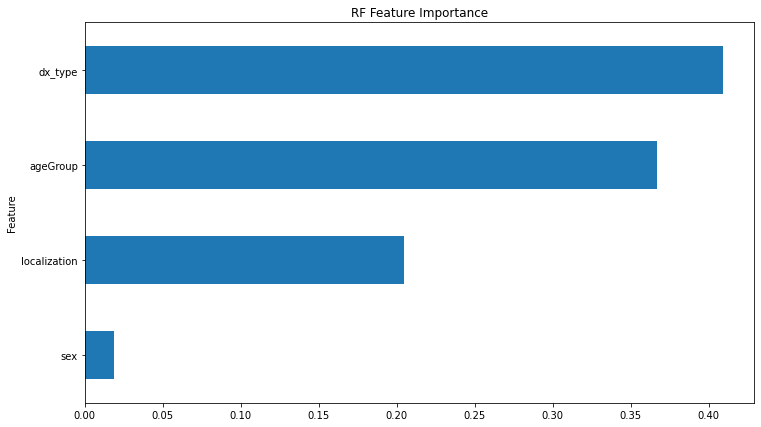

In [80]:
top_feats = 30
calc_feature_importances(rf_model_meta,X_test_meta.columns,top_feats)